# K-means Clustering Analysis on Accident Dataset  
# **Objective:**  
# Identify natural groupings in accident data by applying K-means clustering, evaluating results, and visualizing findings.

## **Data Loading & Preprocessing**

### **Load Dataset**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

df = pd.read_csv('cleaned_data.csv')  # Load cleaned accident data




### **Data Summary**  
**Actions:**  
- Drop target variable (`Accident_Severity`).  
- Remove missing values.  

In [ ]:
df = df.drop(columns=['Accident_Severity'])  # Drop target variable
df = df.dropna()                             # Remove missing values


 **Justification:**  
- Clustering requires complete data.  
- Standardization ensures equal feature weighting.  

In [10]:
# Standardize features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


## **Determine Optimal Clusters (K)**
# **k selection:**


In [ ]:
k_values = range(2, 10)
silhouette_avg_values = []
for k in k_values:
 kmeans = KMeans (n_clusters=k, random_state=43)
 kmeans_result = kmeans.fit(scaled_data)
 silhouette_avg = silhouette_score(scaled_data, kmeans_result.labels_)
 silhouette_avg_values.append(silhouette_avg)

 #Finding the first highest average Silhoutte score

highest_k = k_values[np.argmax(silhouette_avg_values)]
highest_score = max(silhouette_avg_values)

# Finding the second highest average Silhouette score
silhouette_avg_values_sorted = sorted(silhouette_avg_values, reverse=True)
secondHighest_score = silhouette_avg_values_sorted[1]
secondHighest_k = k_values[silhouette_avg_values.index(secondHighest_score)]
# Plot the silhouette scores for different values of k
plt.plot(k_values, silhouette_avg_values, marker='o')
plt.title('Silhouette Analysis for K-Means Clustering')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.show()

### **Elbow Method**

Elbow method for optimal k:

The elbow method helps us choose the best number of clusters for K-means clustering. It works by testing different numbers of clusters and calculating how tightly grouped the data points are within each cluster. As we increase the number of clusters, the clusters get smaller and more compact, which reduces WCSS. However, after a certain point, adding more clusters doesn’t make much difference in compactness—this is the “elbow” point on the graph. The elbow point suggests the ideal number of clusters, as it shows where adding more clusters no longer improves the results much, so we can say that the elbow value is the third k we will choose for th k-means algorithm.

In [ ]:
!pip install kneed
import kneed 
from kneed import KneeLocator
# Standardize the data
wss_values = []
k_values = range (1, 11)
for k in k_values:
 kmeans = make_pipeline(StandardScaler(), KMeans(n_clusters=k, n_init='auto',random_state=1))
 kmeans.fit(scaled_data)
 wss_values.append(kmeans.named_steps['kmeans'].inertia_)

# Plot the elbow method
plt.plot(k_values, wss_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-cluster Sum of Squares (WSS)')
plt.title('Elbow Method for Optimal k')

knee=KneeLocator(k_values,wss_values,curve='convex', direction='decreasing')
turning_point = knee.elbow

plt.axvline(x=turning_point,linestyle='--', color='red', label=f'Chosen k = {turning_point}')
plt.legend ()
plt.show()

## **Clustering & Visualization**

### **k-means algorathem where k=4**

In [ ]:
# k-means using k=4
np.random.seed (43)
kmeans = KMeans(n_clusters=4, random_state=43)
kmeans_result = kmeans.fit(scaled_data)
# Print the clustering result
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result.labels_)


kmeans = KMeans(n_clusters=4,n_init='auto')
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(scaled_data)
visualizer.show()

In [ ]:
# Perform k-means clustering with k=4
kmeans = KMeans(n_clusters=4, random_state=43, n_init='auto')
kmeans.fit(scaled_data)
labels = kmeans.labels_
X=scaled_data
# Compute the WSS (Within-Cluster Sum of Squares)
wss = kmeans.inertia_

# Compute the Average Silhouette Score
silhouette_average = silhouette_score(X, labels)

# Print the evaluation metrics
print("WSS:", wss)
print("Average Silhouette Score:", silhouette_average)

### **k-means algorathem where k=5**

In [ ]:
# k-means using k=5
np.random.seed (44)
kmeans = KMeans(n_clusters=5, random_state=44)
kmeans_result = kmeans.fit(scaled_data)
# Print the clustering result
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result.labels_)

kmeans = KMeans(n_clusters=5,n_init='auto')
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(scaled_data)
visualizer.show()

In [ ]:
# Perform k-means clustering with k=5
kmeans = KMeans(n_clusters=5, random_state=44, n_init='auto')
kmeans.fit(scaled_data)
labels = kmeans.labels_
X=scaled_data
# Compute the WSS (Within-Cluster Sum of Squares)
wss = kmeans.inertia_

# Compute the Average Silhouette Score
silhouette_average = silhouette_score(X, labels)

# Print the evaluation metrics
print("WSS:", wss)
print("Average Silhouette Score:", silhouette_average)

### **k-means algorathem where k=7**

In [ ]:
# k-means using k=7
np.random.seed (45)
kmeans = KMeans(n_clusters=7, random_state=45)
kmeans_result = kmeans.fit(scaled_data)
# Print the clustering result
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result.labels_)

kmeans = KMeans(n_clusters=7,n_init='auto')
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(scaled_data)
visualizer.show()

In [ ]:
# Perform k-means clustering with k=7
kmeans = KMeans(n_clusters=7, random_state=45, n_init='auto')
kmeans.fit(scaled_data)
labels = kmeans.labels_
X=scaled_data
# Compute the WSS (Within-Cluster Sum of Squares)
wss = kmeans.inertia_

# Compute the Average Silhouette Score
silhouette_average = silhouette_score(X, labels)

# Print the evaluation metrics
print("WSS:", wss)
print("Average Silhouette Score:", silhouette_average)

## **Results Comparison & Interpretation**

### **Metrics Comparison**

In [16]:
print(f"{'k':<5}{'Inertia':<15}{'Silhouette Score':<20}")
for k in k_values:
    print(f"{k:<5}{results[k]['inertia']:<15.2f}{results[k]['silhouette']:<20.4f}")


k    Inertia        Silhouette Score    
2    10033.61       0.1003              
4    8931.66        0.0865              
6    8138.06        0.0902              


### **Cluster Characteristics (k=4)**

<Figure size 1500x800 with 0 Axes>

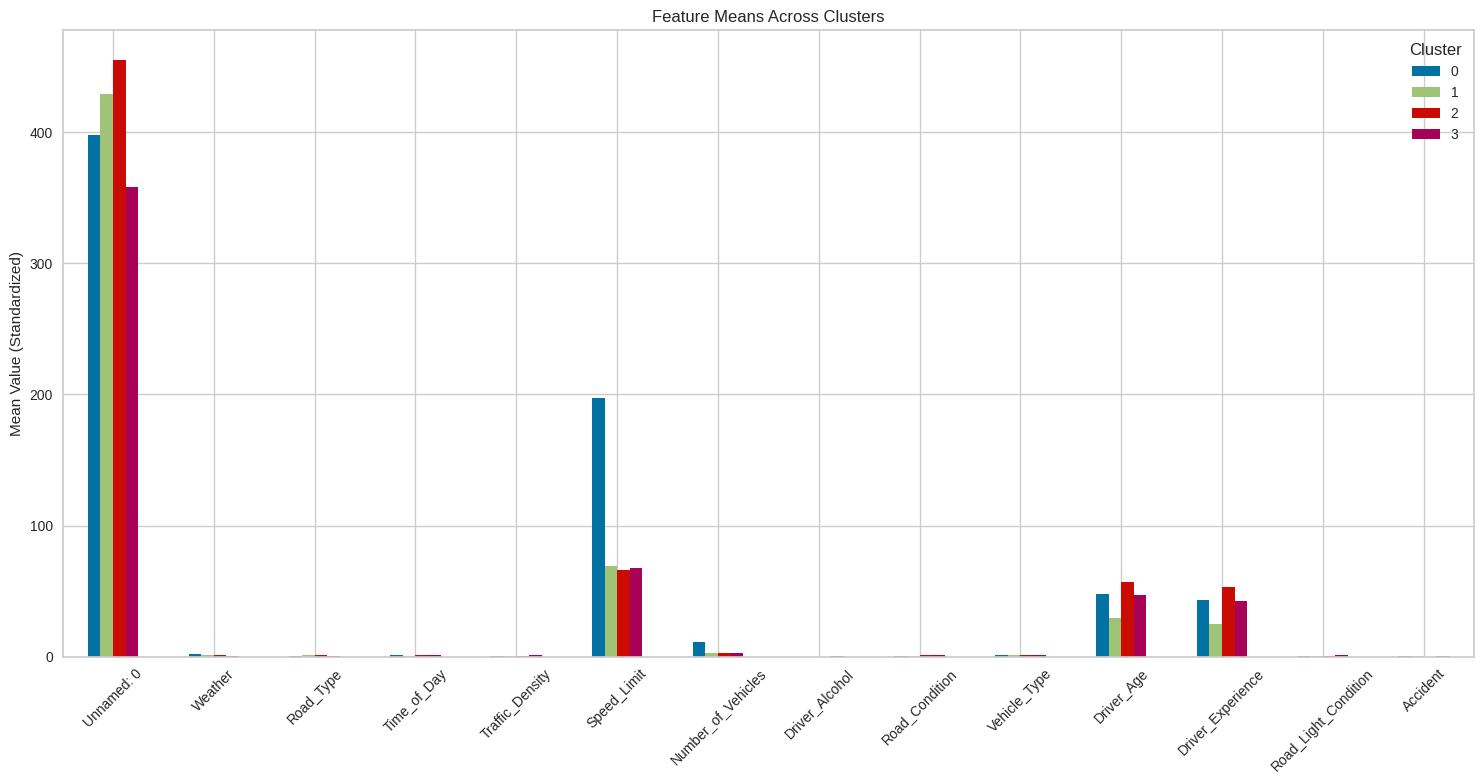

In [17]:
best_k = 4
df['Cluster'] = results[best_k]['labels']
cluster_stats = df.groupby('Cluster').mean()

plt.figure(figsize=(15, 8))
cluster_stats.T.plot(kind='bar', figsize=(15, 8))
plt.title('Feature Means Across Clusters')
plt.ylabel('Mean Value (Standardized)')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

 **Interpretation:**  
- Clusters with high `Speed_Limit` may indicate accident-prone zones.  
- Differences in `Weather_Conditions` could suggest environmental risk factors.  

### **Final Notes**  
- **Optimal K**: Chose `k=4` based on silhouette scores.  
- **Next Steps**: Explore domain-specific insights (e.g., high-risk clusters for policy interventions).